# Mini Projekt 

- Fabian Oppermann
- Petruta-Denisa Biholari
- Philipp Hasel

https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024

## 1. Datenbeschreibung

Die Daten stammen von Kaggle und beinhalten die meistgestreamten Songs auf Spotify im Jahr 2024. Die Daten sind in einer CSV-Datei gespeichert und enthalten folgende Spalten:

| Feld | Datentyp | Beschreibung |
|------|----------|-------------|
| Track | String | Name des Musikstücks |
| Album Name | String | Name des Albums, zu dem der Track gehört |
| Artist | String | Name des Künstlers oder der Band |
| Release Date | Date | Veröffentlichungsdatum des Tracks |
| ISRC | String | International Standard Recording Code (eindeutige Kennzeichnung) |
| All Time Rank | Integer | Gesamtranking des Songs auf allen Plattformen |
| Track Score | Float | Berechneter Popularitätswert des Tracks |
| Spotify Streams | Numeric | Anzahl der Streams auf Spotify |
| Spotify Playlist Count | Integer | Anzahl der Spotify-Playlists, die den Track enthalten |
| Spotify Playlist Reach | Numeric | Potenzielle Reichweite durch Spotify-Playlists |
| Spotify Popularity | Integer | Popularitätswert auf Spotify (0-100) |
| YouTube Views | Numeric | Anzahl der Aufrufe auf YouTube |
| YouTube Likes | Numeric | Anzahl der Likes auf YouTube |
| TikTok Posts | Numeric | Anzahl der TikTok-Beiträge mit dem Track |
| TikTok Likes | Numeric | Anzahl der Likes auf TikTok-Beiträgen mit dem Track |
| TikTok Views | Numeric | Anzahl der Aufrufe auf TikTok-Beiträgen mit dem Track |
| YouTube Playlist Reach | Numeric | Potenzielle Reichweite durch YouTube-Playlists |
| Apple Music Playlist Count | Integer | Anzahl der Apple Music-Playlists mit dem Track |
| AirPlay Spins | Numeric | Anzahl der Radiowiedergaben über AirPlay |
| SiriusXM Spins | Integer | Anzahl der Wiedergaben auf SiriusXM |
| Deezer Playlist Count | Integer | Anzahl der Deezer-Playlists mit dem Track |
| Deezer Playlist Reach | Numeric | Potenzielle Reichweite durch Deezer-Playlists |
| Amazon Playlist Count | Integer | Anzahl der Amazon Music-Playlists mit dem Track |
| Pandora Streams | Numeric | Anzahl der Streams auf Pandora |
| Pandora Track Stations | Numeric | Anzahl der Pandora-Stationen, die den Track spielen |
| Soundcloud Streams | Numeric | Anzahl der Streams auf Soundcloud |
| Shazam Counts | Numeric | Anzahl der Shazam-Erkennungen |
| TIDAL Popularity | Integer | Popularitätswert auf TIDAL |
| Explicit Track | Boolean | Kennzeichnung für explizite Inhalte (0=nein, 1=ja) |



In [ ]:
import pandas as pd

df = pd.read_csv("MostStreamedSpotifySongs2024.csv", encoding='latin1')

print("Zufällige Stichprobe aus den Daten:")
print(df.sample(5))

print("Die ersten 5 Einträge im Datensatz:")
print(df.head())


print("Infos über Spalten, Datentypen und Null-Werte:")
print(df.info())

print("Übersicht der Daten:")
print(df.describe())

print("Einzigartige Künstler:innen:")
print(df['Artist'].unique())

print("\nAnzahl unterschiedlicher Alben:")
print(df['Album Name'].nunique())

Zufällige Stichprobe aus den Daten:
                                                  Track  \
465                                      Girls Like You   
4519                                        Nachts wach   
3650                                  Voices In My Head   
2014                                          Fluxxwave   
2914  Head Shoulders Knees & Toes (feat. Norma Jean ...   

                                             Album Name              Artist  \
465                             Red Pill Blues (Deluxe)            Maroon 5   
4519                               Nachts wach - Single     Miksu / Macloud   
3650                                  Voices In My Head  Falling In Reverse   
2014                                          Fluxxwave        Clovis Reyes   
2914  Head Shoulders Knees & Toes (feat. Norma Jean ...            Ofenbach   

     Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
465     11/3/2017  USUM71710831           464         71

## 2. Datenvisualisierung vor der Datenbereinigung

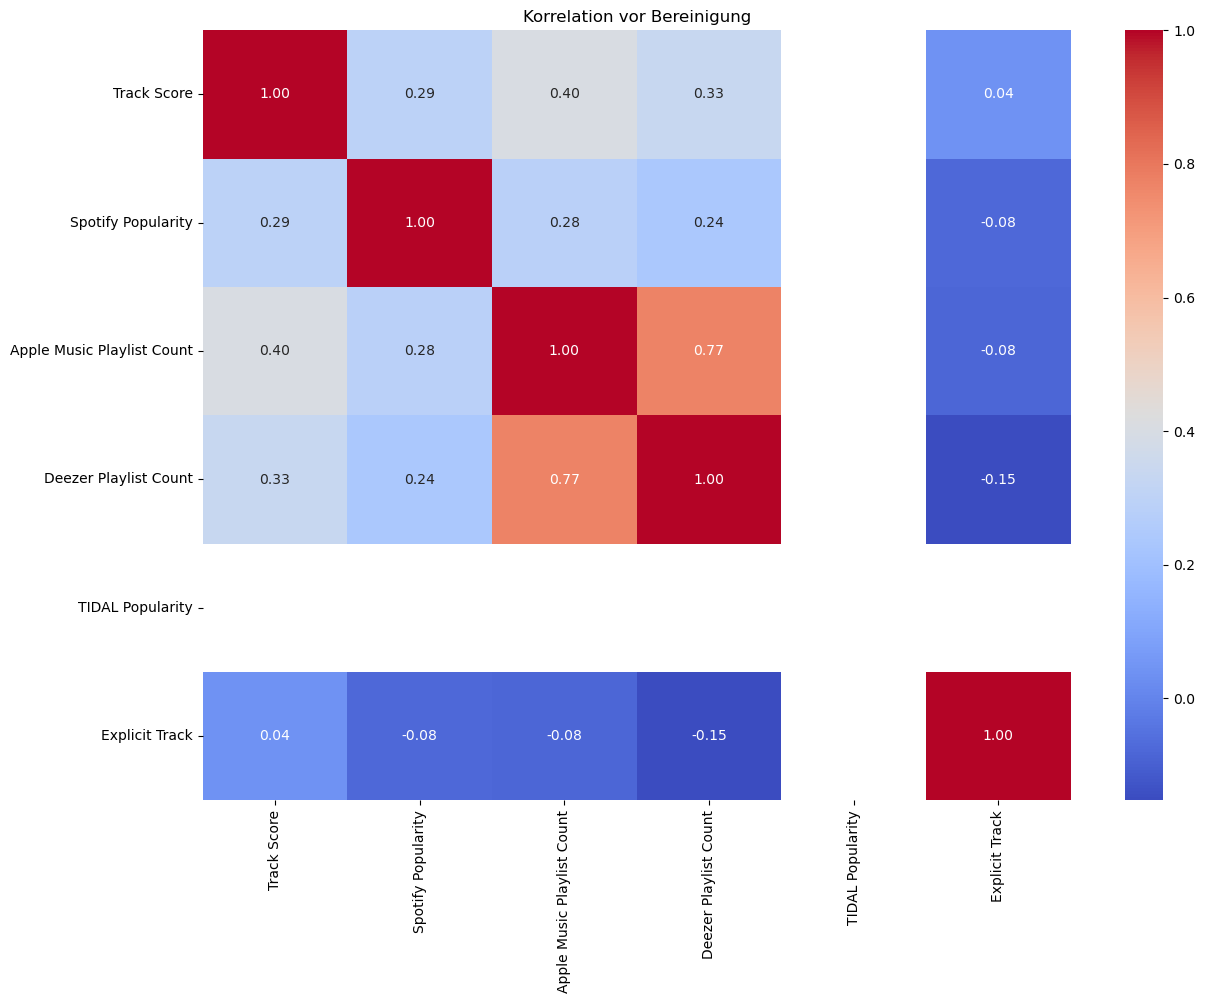

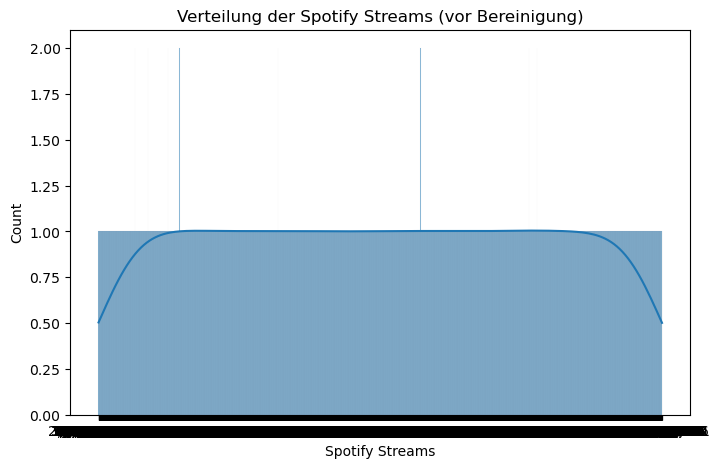

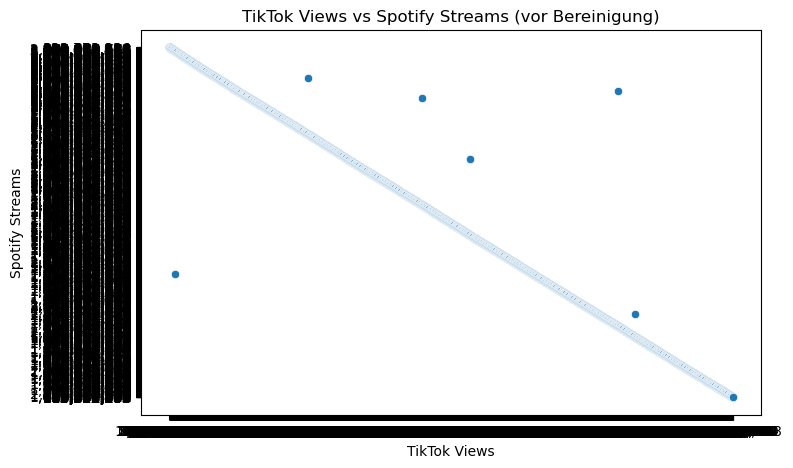

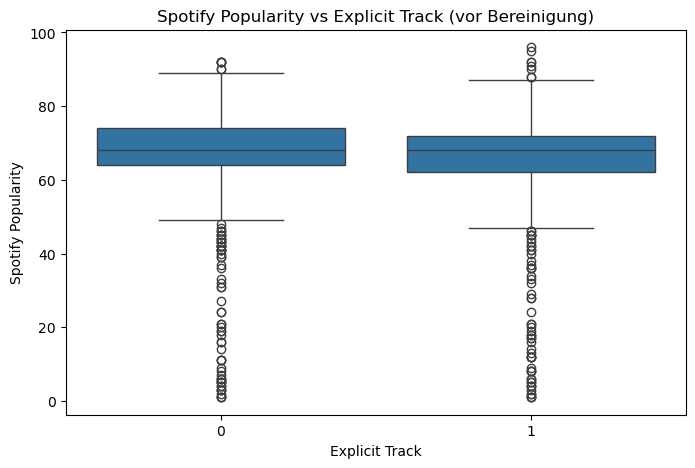

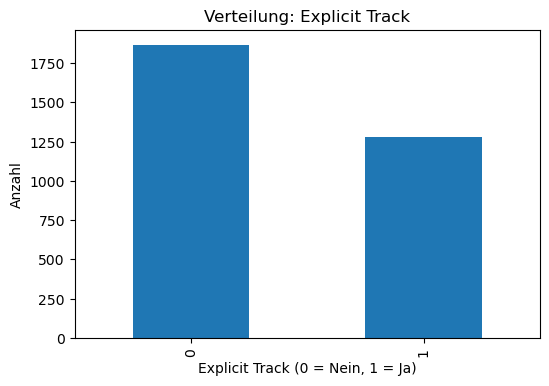

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelation vor Bereinigung")
plt.show()

# Histogramm-Spotify Streams:
plt.figure(figsize=(8, 5))
sns.histplot(df['Spotify Streams'], kde=True)
plt.title("Verteilung der Spotify Streams (vor Bereinigung)!!!")
plt.show()

# Scatterplot-TikTok Views vs Spotify Streams!!!:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="TikTok Views", y="Spotify Streams", data=df)
plt.title("TikTok Views vs Spotify Streams (vor Bereinigung)")
plt.show()

# Boxplot-Spotify Popularity vs Explicit Track:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Explicit Track", y="Spotify Popularity", data=df)
plt.title("Spotify Popularity vs Explicit Track (vor Bereinigung)")
plt.show()

# Verteilung von Explicit Track:
plt.figure(figsize=(6, 4))
df['Explicit Track'].value_counts().plot(kind='bar')
plt.title("Verteilung: Explicit Track")
plt.xlabel("Explicit Track (0 = Nein, 1 = Ja)")
plt.ylabel("Anzahl")
plt.show()

## 3. Datenberenigung

In [ ]:
df_clean = df.copy()

# Fehlende Werte sollen angezeigt werden.
missing = df_clean.isnull().sum()
print("\nFehlende Werte pro Spalte:")
print(missing[missing > 0])

df_clean = df_clean[df_clean.isnull().sum(axis=1) <= 5]

num_cols = df_clean.select_dtypes(include='number').columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

# Datumskonvertierung
df_clean["Release Date"] = pd.to_datetime(df_clean["Release Date"], errors="coerce")

df_clean.to_csv("korr.csv", index=False)


Fehlende Werte pro Spalte:
YouTube Views               10
YouTube Likes               12
TikTok Posts               234
TikTok Likes               107
TikTok Views               108
AirPlay Spins               45
SiriusXM Spins             815
Deezer Playlist Reach       73
Pandora Streams            185
Pandora Track Stations     250
Soundcloud Streams        2038
Shazam Counts              140
TIDAL Popularity          3147
dtype: int64


## 4. Datenvisualisierung nach der Datenberenigung

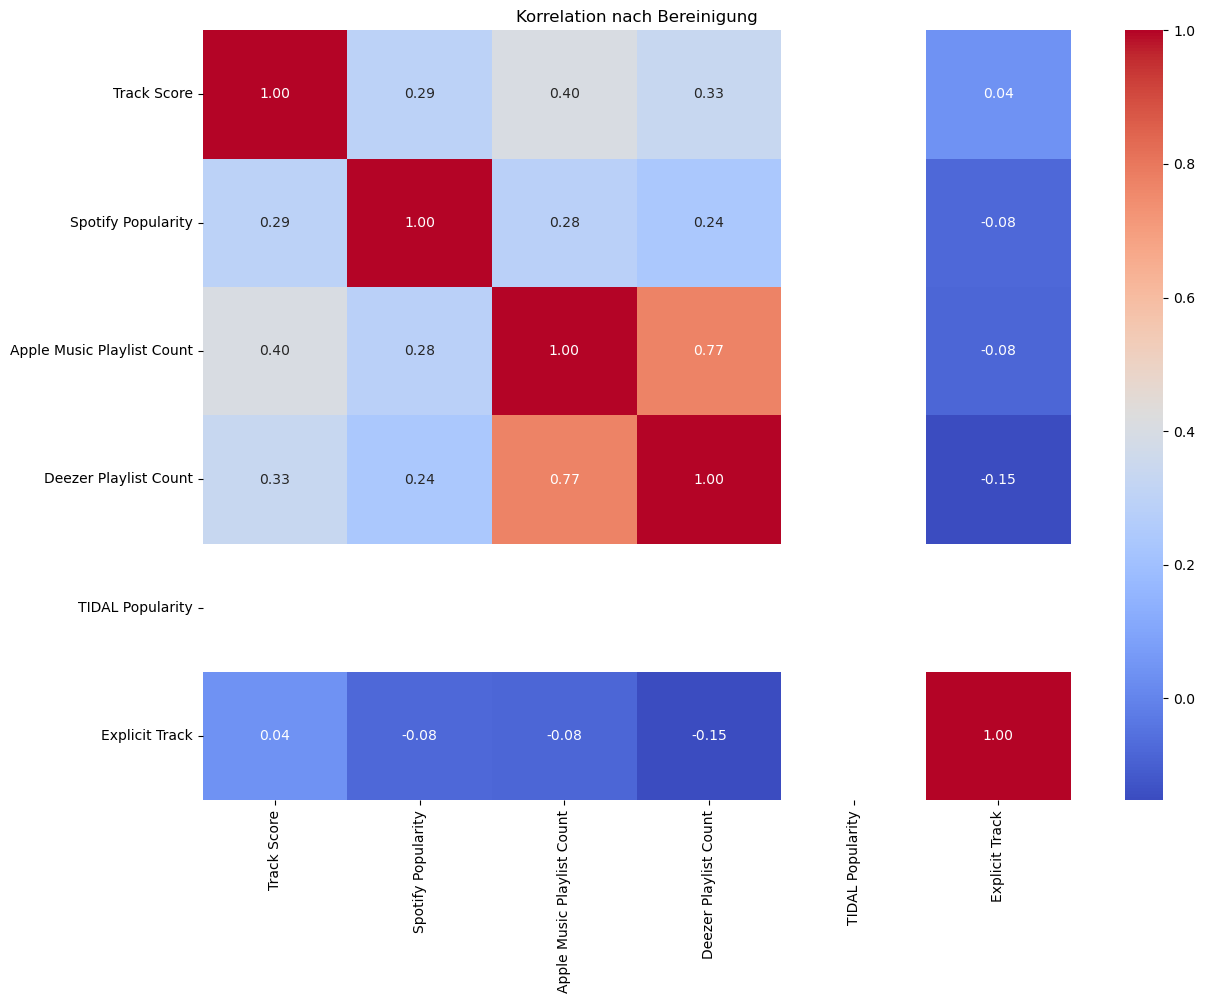

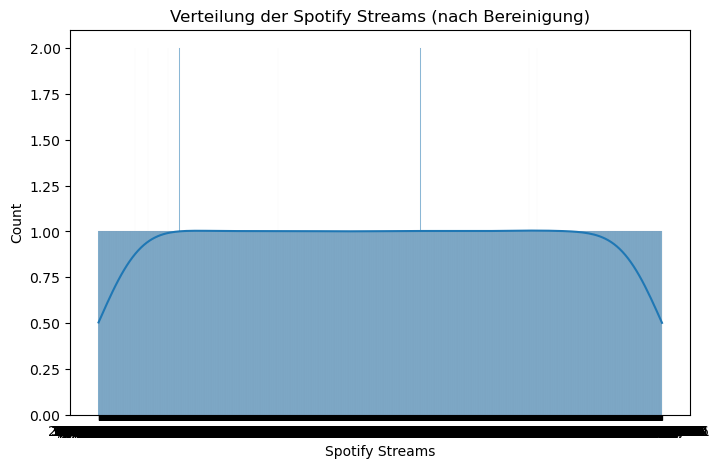

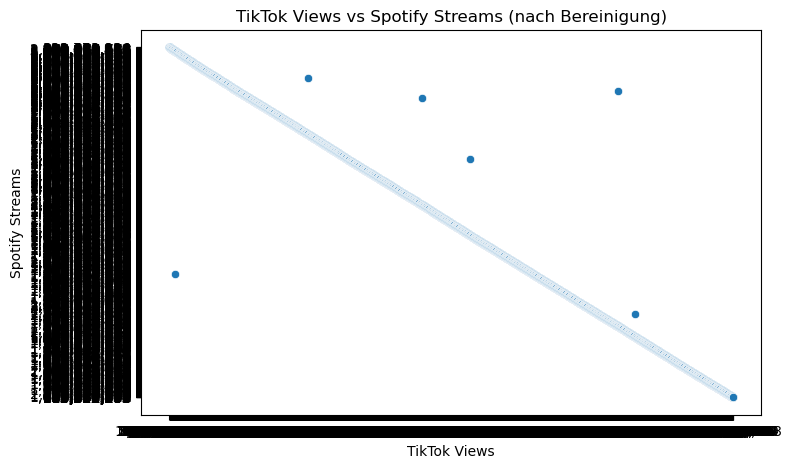

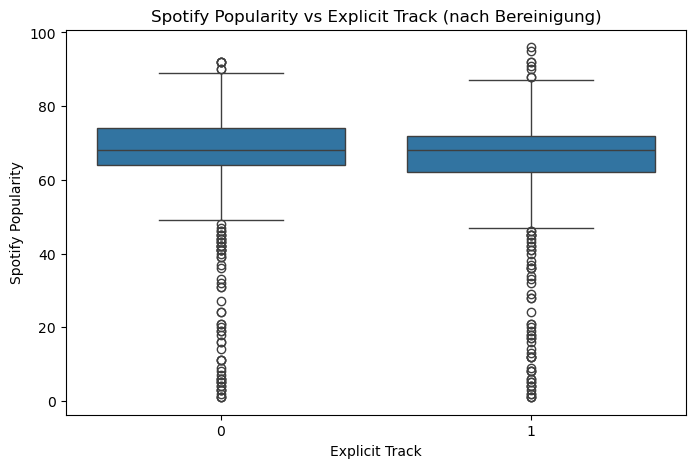

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelation nach Bereinigung")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Spotify Streams'], kde=True)
plt.title("Verteilung der Spotify Streams (nach Bereinigung)!!!")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x="TikTok Views", y="Spotify Streams", data=df_clean)
plt.title("TikTok Views vs Spotify Streams (nach Bereinigung)!!!")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="Explicit Track", y="Spotify Popularity", data=df_clean)
plt.title("Spotify Popularity vs Explicit Track (nach Bereinigung)")
plt.show()

## Erkenntnisse:

- Die Korrelationen wurden durch die Reduktion realistischer.
- Außerdem sind die Visualisierungen nun klarer, da es weniger Ausreißer gibt.
- Außergewöhnlich ist aber, dass das Ungleichgewicht bei 'Explicit Track' nach der Bereinigung bestehen bleibt.
n.")

## 5. Datenvorbereitung

In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df = pd.read_csv("korr.csv")

def popularity_class(value):
    if value <= 40:
        return "Low"
    elif value <= 70:
        return "Medium"
    else:
        return "High"

df["PopularityClass"] = df["Spotify Popularity"].apply(popularity_class)

X = df.drop(columns=["Spotify Popularity", "PopularityClass", "Track", "Album Name", "Artist", "ISRC", "Release Date"])

missing_only_cols = [col for col in X.columns if X[col].isnull().all()]
if missing_only_cols:
    print(f"Entferne Spalten mit nur fehlenden Werten: {missing_only_cols}")
    X = X.drop(columns=missing_only_cols)

y = df["PopularityClass"]

print("Klassenverteilung:\n", y.value_counts())

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object", "bool"]).columns

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    clf_pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", model)
    ])
    
    print(f"\n Modell: {name}")
    clf_pipeline.fit(X_train, y_train)
    y_pred = clf_pipeline.predict(X_val)
    print(classification_report(y_val, y_pred, zero_division=0))


Entferne Spalten mit nur fehlenden Werten: ['TIDAL Popularity']
Klassenverteilung:
 PopularityClass
Medium    1953
High      1107
Low         87
Name: count, dtype: int64

 Modell: SVM
              precision    recall  f1-score   support

        High       0.74      0.32      0.44       222
         Low       0.00      0.00      0.00        17
      Medium       0.69      0.94      0.80       391

    accuracy                           0.70       630
   macro avg       0.48      0.42      0.41       630
weighted avg       0.69      0.70      0.65       630


 Modell: Decision Tree
              precision    recall  f1-score   support

        High       0.57      0.50      0.53       222
         Low       0.00      0.00      0.00        17
      Medium       0.72      0.79      0.75       391

    accuracy                           0.67       630
   macro avg       0.43      0.43      0.43       630
weighted avg       0.65      0.67      0.66       630


 Modell: Random Forest
     